# Aquila Wavelet analysis

Test of the wavelet analysis technique on Aquila.

In [2]:
import aplpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


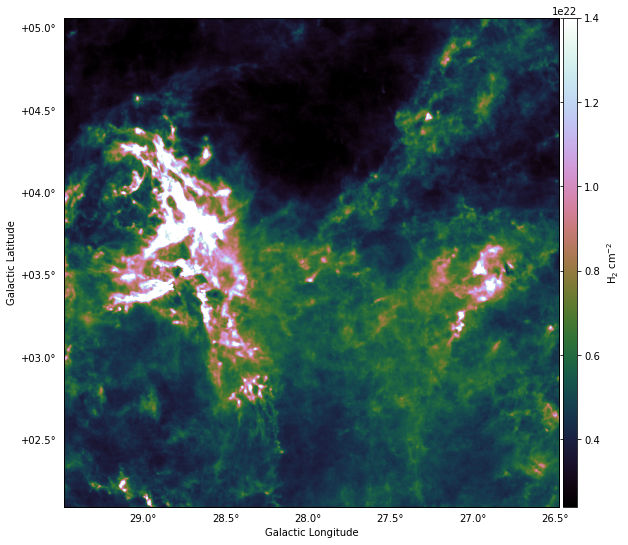

In [3]:
figfile = '/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_aquilaM2_column_density_map_gal_cut.fits'
fig = aplpy.FITSFigure(figfile, convention='calabretta')
fig.show_colorscale(vmin=2.4e21,vmax=1.4e22,cmap='cubehelix')
fig.tick_labels.set_xformat('dd.d')
fig.tick_labels.set_yformat('dd.d')
#fig.ticks.set_minor_frequency(0.1,0.1)
fig.ticks.set_xspacing(0.5)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'H$_{2}$ cm$^{-2}$')

In [4]:
from bokeh.plotting import figure as figbok
from bokeh.io import output_notebook
from bokeh.io import show as showbok
output_notebook()

from astropy.io import fits
from astropy import wcs
from powspec import powspec
from wavan import fan_trans
from rebin import congrid

Loading BokehJS ...

In [164]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data

refact = 5.
#im = rebin(im, (int(im.shape[0]/refact), int(im.shape[1]/refact)))
im = congrid(im,(int(im.shape[0]/refact),int(im.shape[1]/refact)), method='neighbour', centre=True, minusone=False)

#Modify header
header = HDU[0].header
w = wcs.WCS(header)

reso = header["CDELT2"]
xw,yw = w.all_pix2world(0, 0, 0)

header["CDELT1"] = -1.0 * reso *refact
header["CDELT2"] = reso * refact
header["NAXIS1"] = im.shape[1]/refact
header["NAXIS2"] = im.shape[0]/refact
header["CRPIX1"] = 0.00
header["CRPIX2"] = 0.00
header["CRVAL1"] = xw.item()
header["CRVAL2"] = yw.item()

fits.writeto('/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_aquilaM2_column_density_map_gal_cut_rbin.fits',\
            im,header,overwrite=True)

Put a threshold on high intensity sources.

In [165]:
imthres = im.copy()
imthres[im > 2.5e22] = 2.5e22

sig = imthres[687,:]
x = range(np.shape(im)[1])

Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="Pixels", y_axis_label="Values", tools=Tools)
f.line(x,sig)

showbok(f)

In [166]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60. * refact

#Fourier power spectrum
tab_k, spec_k = powspec(imthres, reso=1)

#Plot Fourier power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [arcmin^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools)
f.line(tab_k, spec_k, legend='Fourier')

#Set a list of q
q=[]
q[0:4]=[1.4]*5
q[5:25]=[2.5]*20
#q=[2.5]*25
print q

#Wavelet power spectrum
wt, S11a, wav_k, S1a, q = fan_trans(imthres, reso=reso, q=q, qdyn=True)

f.diamond(wav_k, S1a[0,:], legend='Wavelet',color='black',line_width=5)
f.triangle(wav_k, S1a[1,:], legend='Coherent',color='blue',line_width=5)
f.square(wav_k, S1a[2,:], legend='Gaussian',color='red',line_width=5)

#Power law fit
coef = np.polyfit(np.log(wav_k[7:14]),np.log(S1a[2,7:14]),deg=1)
yfit = np.exp(coef[1])*wav_k**coef[0]

print "Power law = ", coef[0]

f.line(wav_k, yfit, legend='Fit',line_dash='dashed')

showbok(f)

[1.4, 1.4, 1.4, 1.4, 1.4, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]
Power law =  -3.3517073817175684


[1.4, 1.4, 1.4, 1.4, 1.4, 1.9999999999999996, 1.8999999999999995, 1.9999999999999996, 2.0999999999999996, 2.0999999999999996, 2.1999999999999997, 2.0999999999999996, 2.0999999999999996, 2.1999999999999997, 2.0999999999999996, 2.1999999999999997, 2.1999999999999997, 2.1999999999999997, 2.1999999999999997, 2.1999999999999997, 2.4, 2.3, 2.3, 2.5, 2.5]


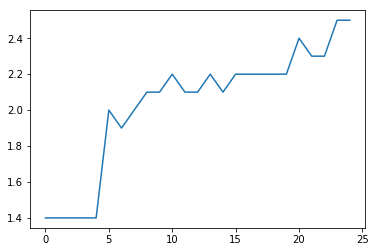

In [167]:
print q

x = range(25)
plot(x,np.array(q).reshape(25))

In [171]:
np.save('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_wt_rbin.npy',wt)
np.save('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_S11a_rbin.npy',S11a)
np.save('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_wav_k_rbin.npy',wav_k)
np.save('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_S1a_rbin.npy',S1a)
np.save('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_q_rbin.npy',q)

In [14]:
wt = np.load('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_wt_rbin.npy')
S11a = np.load('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_S11a_rbin.npy')
wav_k = np.load('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_wav_k_rbin.npy')
S1a = np.load('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_S1a_rbin.npy')
q = np.load('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_q_rbin.npy')

3.206783538416775e+45
3.908714446007539e+45


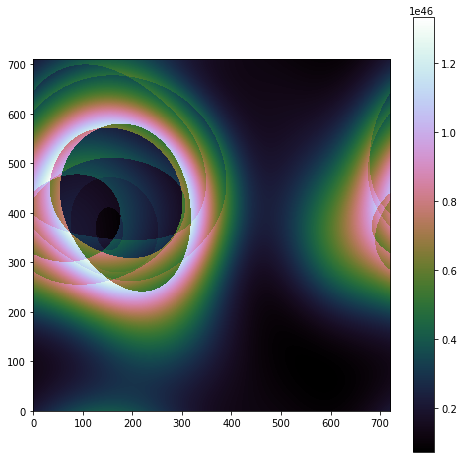

In [138]:
#Put an additional threshold on wavelet coefficients at larger scales according to the power law fit

scl = 5

wtbuf = np.copy(S11a[2*M+scl,:,:])
wtbuf2 = np.copy(wt[2*M+scl,:,:])
wtsig = np.std(wtbuf)

#select = np.where(wtbuf > yfit[scl]+3*wtsig)
#wtbuf[select] = 0.
#wtbuf2[select] = 0.
print yfit[scl]
print np.mean(wtbuf)
                  
plt.figure(figsize=(8,8))
imshow(wtbuf,origin='below',cmap='cubehelix')
plt.colorbar()

#Do not work, since I am only dealing with the real part...

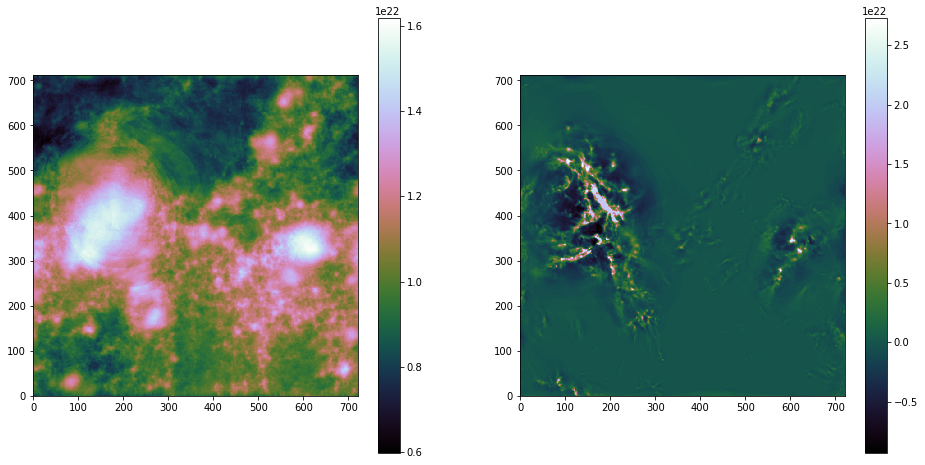

In [175]:
M = wav_k.shape[0]

coherent = np.sum(wt[M+5:2*M,:,:],axis=0)#+wtbuf2
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0)#+np.sum(wt[2*M+5:3*M,:,:],axis=0)+wtbuf2

fits.writeto('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_cohe_rbin.fits',\
            coherent.real,header,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/Herschel/Gould Belt/analysis/aquila_density_gaussian_rbin.fits',\
            Gaussian.real,header,overwrite=True)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(Gaussian.real,origin='below',cmap='cubehelix')
plt.colorbar()
plt.subplot(122)
plt.imshow(coherent.real,origin='below',cmap='cubehelix')
plt.colorbar()

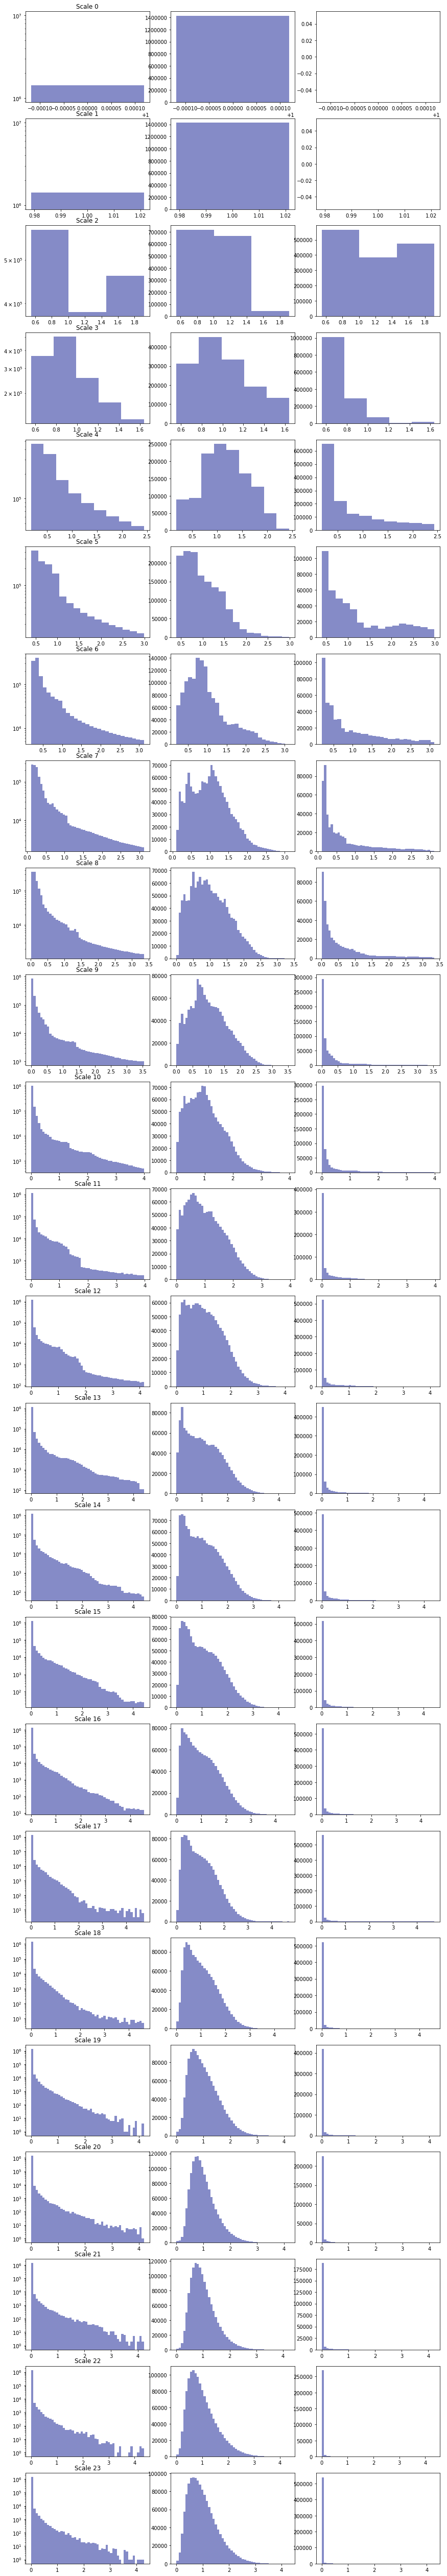

In [157]:
fig, axs = plt.subplots(M,3,figsize=(12,70))

axs = axs.ravel()
fig.tight_layout()

for i in range(M):
    
    if np.mean(S11a[M+i,:,:]) !=0:
        wc = (S11a[M+i,:,:])/np.mean(S11a[M+i,:,:])
    else:
        wc = np.zeros((im.shape[0],im.shape[1]))
    wo = (S11a[i,:,:])/np.mean(S11a[i,:,:])
    #wg = (S11a[2*M+i,0:100 & 700:,:])/np.mean(S11a[2*M+i,:,:])
    #wg = (S11a[2*M+i,100:700,:])/np.mean(S11a[2*M+i,:,:])
    wg = (S11a[2*M+i,:,:])/np.mean(S11a[2*M+i,:,:])
    
    #Number of independent points
    npix = np.int((imthres.shape[0] * wav_k[i])**2.)
    if npix == 0: nbins=1
    if npix > 0 & npix < 50 : nbins=npix
    if npix > 50 : nbins=50
    
    histo, edges = np.histogram(wo,bins=nbins)
    histo_c, edges = np.histogram(wc[wc != 0.],bins=nbins)
    histo_g, edges = np.histogram(wg[wg != 0.],bins=nbins)
    
    axs[i*3].bar(edges[:-1], histo, width=np.diff(edges), align="edge",edgecolor='none',facecolor='#858bc7')
    axs[i*3].set_title('Scale '+np.str(i))
    axs[i*3].set_yscale('log')
    
    axs[i*3+1].bar(edges[:-1], histo_g, width=np.diff(edges), align="edge",edgecolor='none',facecolor='#858bc7')
    
    axs[i*3+2].bar(edges[:-1], histo_c, width=np.diff(edges), align="edge",edgecolor='none',facecolor='#858bc7')